In [278]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

df = pd.read_csv("mushrooms.csv")

# Perform one-hot encoding for all categorical variables & drop first column to avoid (Edible & Poisonous being double counted.)
df_encoded = pd.get_dummies(df, drop_first=True)
df_e = df_encoded

# Separate the target variable
X = df_encoded.drop(columns=['class_POISONOUS'])  # Independent variables
y = df_encoded['class_POISONOUS']  # Target variable

# Split the dataset into training and testing sets
test_size = len(X) // 2  # Half of the total samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=24)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_true = df_encoded.iloc[X_test.index]['class_POISONOUS']

# Evaluate the model performance accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9997623574144486


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


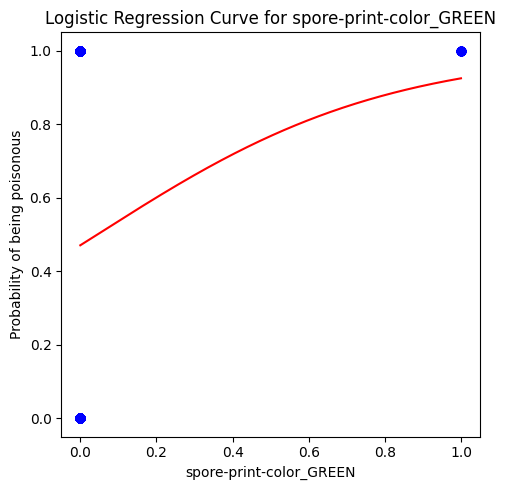

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


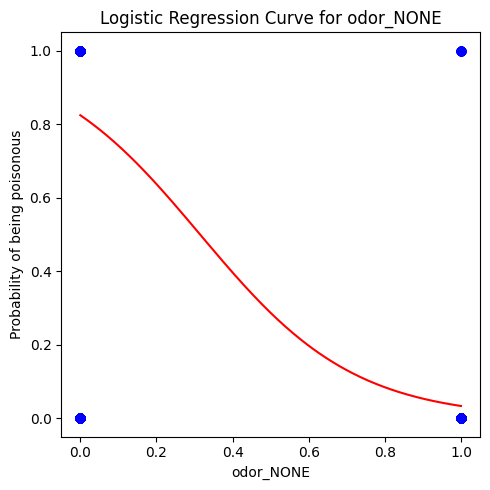

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


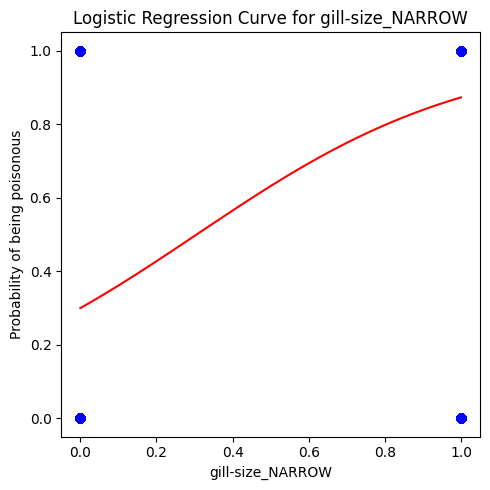

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


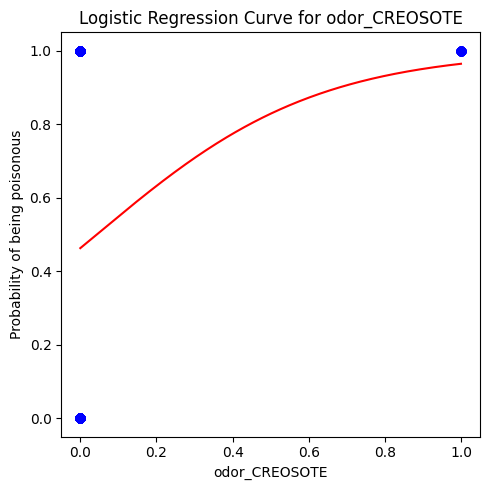

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


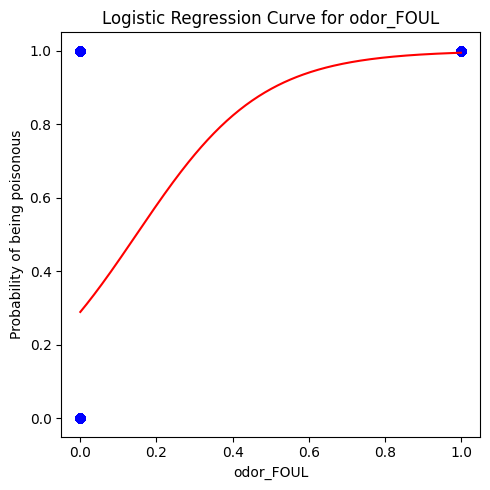

In [290]:
test_columns = ['spore-print-color_GREEN','odor_NONE' ,'gill-size_NARROW', 'odor_CREOSOTE', 'odor_FOUL']

# Iterate over each column name
for column_name in test_columns:
    # Extract the predictor variable (column) from the training set
    X_column = X_train[[column_name]]
    
    # Fit logistic regression model using only the current column
    model_column = LogisticRegression(max_iter=2000)
    model_column.fit(X_column, y_train)
    
    # Get the minimum and maximum values of the column
    min_val = X_column.min().values[0]
    max_val = X_column.max().values[0]
    
    # Predict probabilities for the curve
    X_range = np.linspace(min_val, max_val, 300).reshape(-1, 1)
    y_prob = model_column.predict_proba(X_range)[:, 1]
    
    # Plot the logistic regression curve for the current column
    plt.figure(figsize=(5, 5))
    plt.scatter(X_column, y_train, color='blue', label='Data Points')
    plt.plot(X_range, y_prob, color='red', label='Logistic Regression Curve')
    plt.xlabel(column_name)
    plt.ylabel('Probability of being poisonous')
    plt.title(f'Logistic Regression Curve for {column_name}')
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

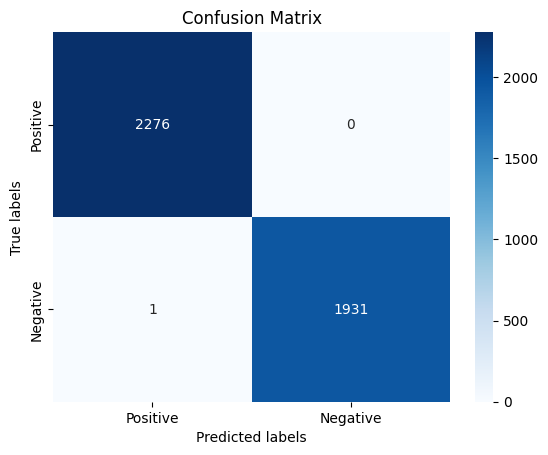

In [230]:
# Construct Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Positive', 'Negative'])
plt.yticks(ticks=[0.5, 1.5], labels=['Positive', 'Negative'])
plt.show()

In [212]:
coefficients = model.coef_[0]
p_values = np.exp(model.coef_)[0]

# Create DataFrame to store coefficients and p-values
variable_stats = pd.DataFrame({'Variable': X.columns, 'Coefficient': coefficients, 'P-value': p_values})

# Sort DataFrame by absolute coefficient values or by p-values
variable_stats_sorted = variable_stats.reindex(variable_stats['Coefficient'].abs().sort_values(ascending=False).index)

print("Top 5 most influential variables:")
print(variable_stats_sorted.head(5))

Top 5 most influential variables:
                   Variable  Coefficient    P-value
79  spore-print-color_GREEN     3.882399  48.540541
23                odor_NONE    -3.561869   0.028386
28         gill-size_NARROW     2.996582  20.017006
19            odor_CREOSOTE     2.963733  19.370149
21                odor_FOUL     2.891721  18.024296


In [236]:
# Sort DataFrame by p-values in ascending order
variable_stats_sorted = variable_stats.sort_values(by='P-value', ascending=True)

# Print the variables with the lowest p-values
print("Lowest 5 variables p-values:")
print(variable_stats_sorted.head(5))

Lowest 5 variables p-values:
                    Variable  Coefficient   P-value
23                 odor_NONE    -3.561869  0.028386
27      gill-spacing_CROWDED    -2.405834  0.090190
42           stalk-root_CLUB    -1.445786  0.235561
18                odor_ANISE    -1.421738  0.241294
81  spore-print-color_PURPLE    -1.420962  0.241482
